In [1]:
import pandas as pd
df = pd.read_csv('dataSetTia.csv', sep='|')

In [2]:
df

,anio,mes,localNestle,ciudadNestle,regionNestle,subcadenaNestle,unidadesVendidas,ventaNeta,totalSo,stock,totalStock
0,2023,2,MILAGRO COLON,MILAGRO,GUAYAS,TIA,3.0,14.94,10.050000,295.0,988.250000
1,2023,5,EL RECREO DURAN,DURAN,GUAYAS,TIA,4.0,19.92,13.400000,797.0,2669.950000
2,2023,1,ZAMORA,ZAMORA,SIERRA SUR,TIA,6.0,35.81,28.080000,488.0,2283.840000
3,2023,2,CHONGON,GUAYAQUIL,GUAYAS,TIA,26.0,179.37,121.680000,559.0,2616.120000
4,2023,2,EL MAESTRO,GUAYAQUIL,GUAYAS,TIA,19.0,122.36,88.920000,723.0,3383.640000
...,...,...,...,...,...,...,...,...,...,...,...
188485,2023,1,SUPERTIA BRISAS,GUAYAQUIL,GUAYAS,TIA,1.0,2.49,1.731480,31.0,53.675880
188486,2023,4,PTVJO AV MANABI,PORTOVIEJO,COSTA,TIA,2.0,3.98,2.677200,138.0,184.726800
188487,2023,6,LLANO GRANDE,QUITO,SIERRA NORTE,TIA,6.0,2.70,1.774080,56.0,16.558080
188488,2023,3,CENTRAL,DAULE,GUAYAS,TIA,1.0,0.58,0.491155,36.0,17.681586


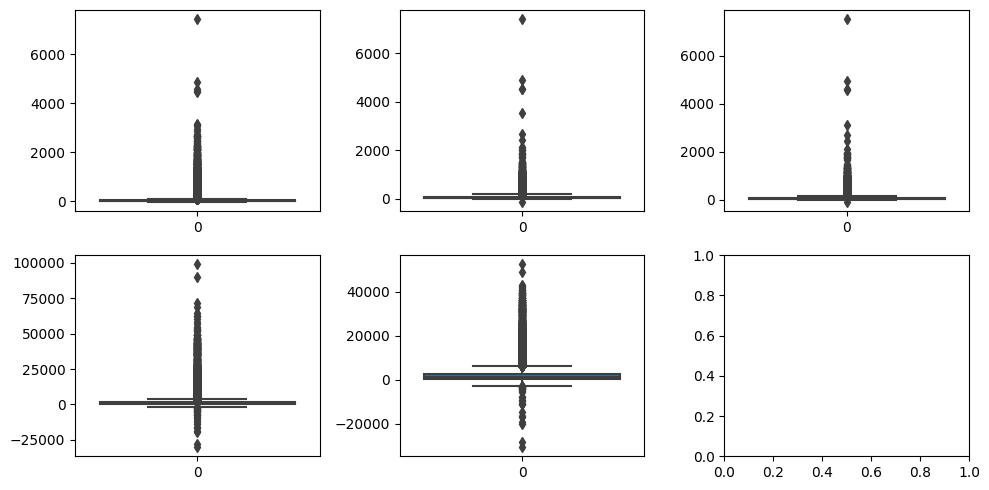

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['unidadesVendidas'], ax = axs[0,0])
plt2 = sns.boxplot(df['ventaNeta'], ax = axs[0,1])
plt3 = sns.boxplot(df['totalSo'], ax = axs[0,2])
plt1 = sns.boxplot(df['stock'], ax = axs[1,0])
plt2 = sns.boxplot(df['totalStock'], ax = axs[1,1])

plt.tight_layout()

<Axes: xlabel='totalSo', ylabel='Density'>

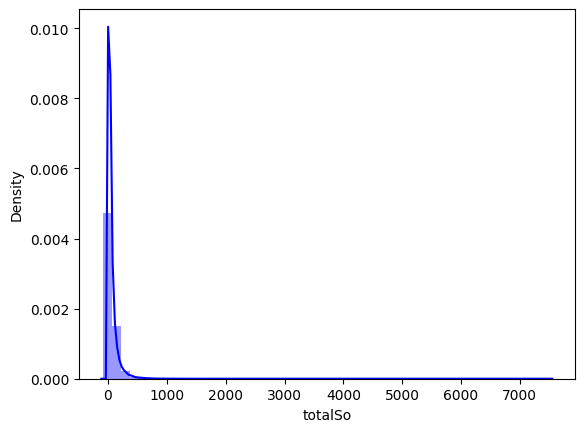

In [4]:
sns.distplot(df['totalSo'],color="blue")

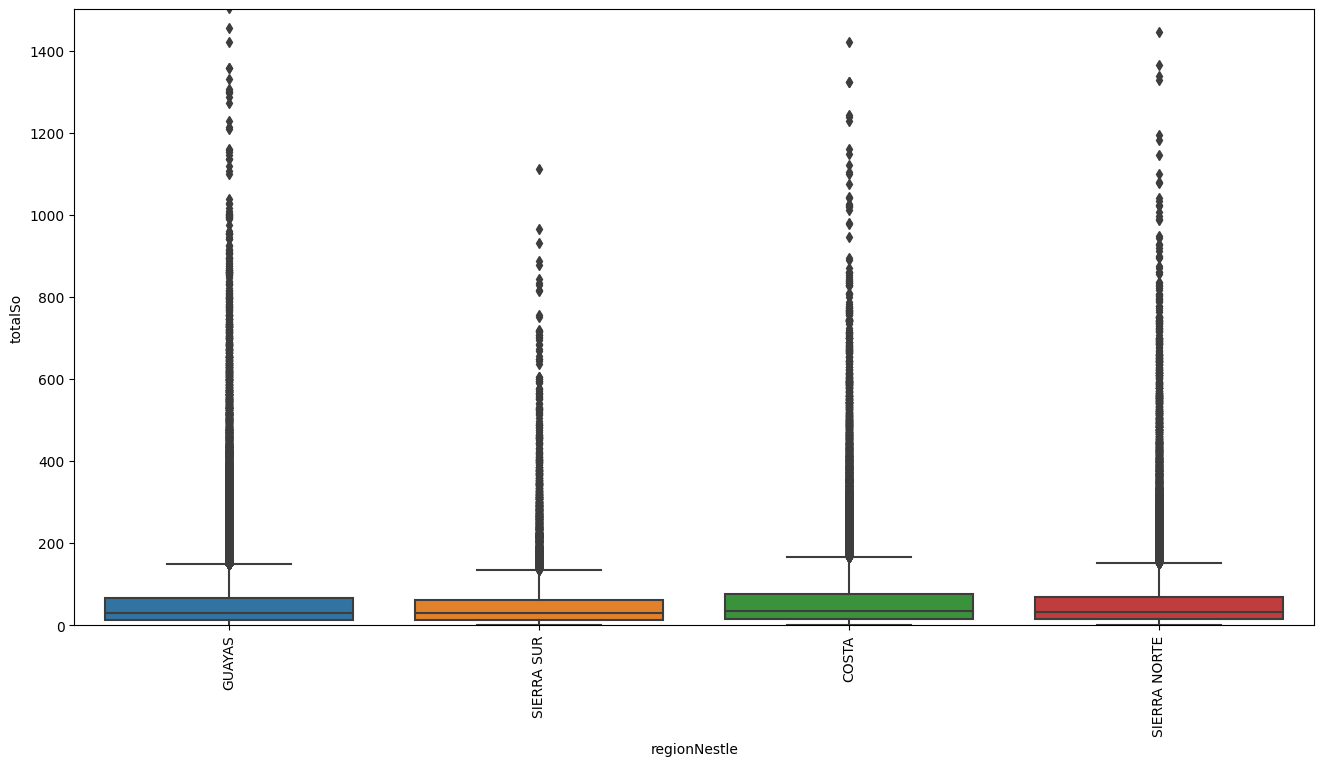

In [5]:
var = 'regionNestle'
data = pd.concat([df['totalSo'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="totalSo", data=data)
fig.axis(ymin=0, ymax=1500);
plt.xticks(rotation=90);

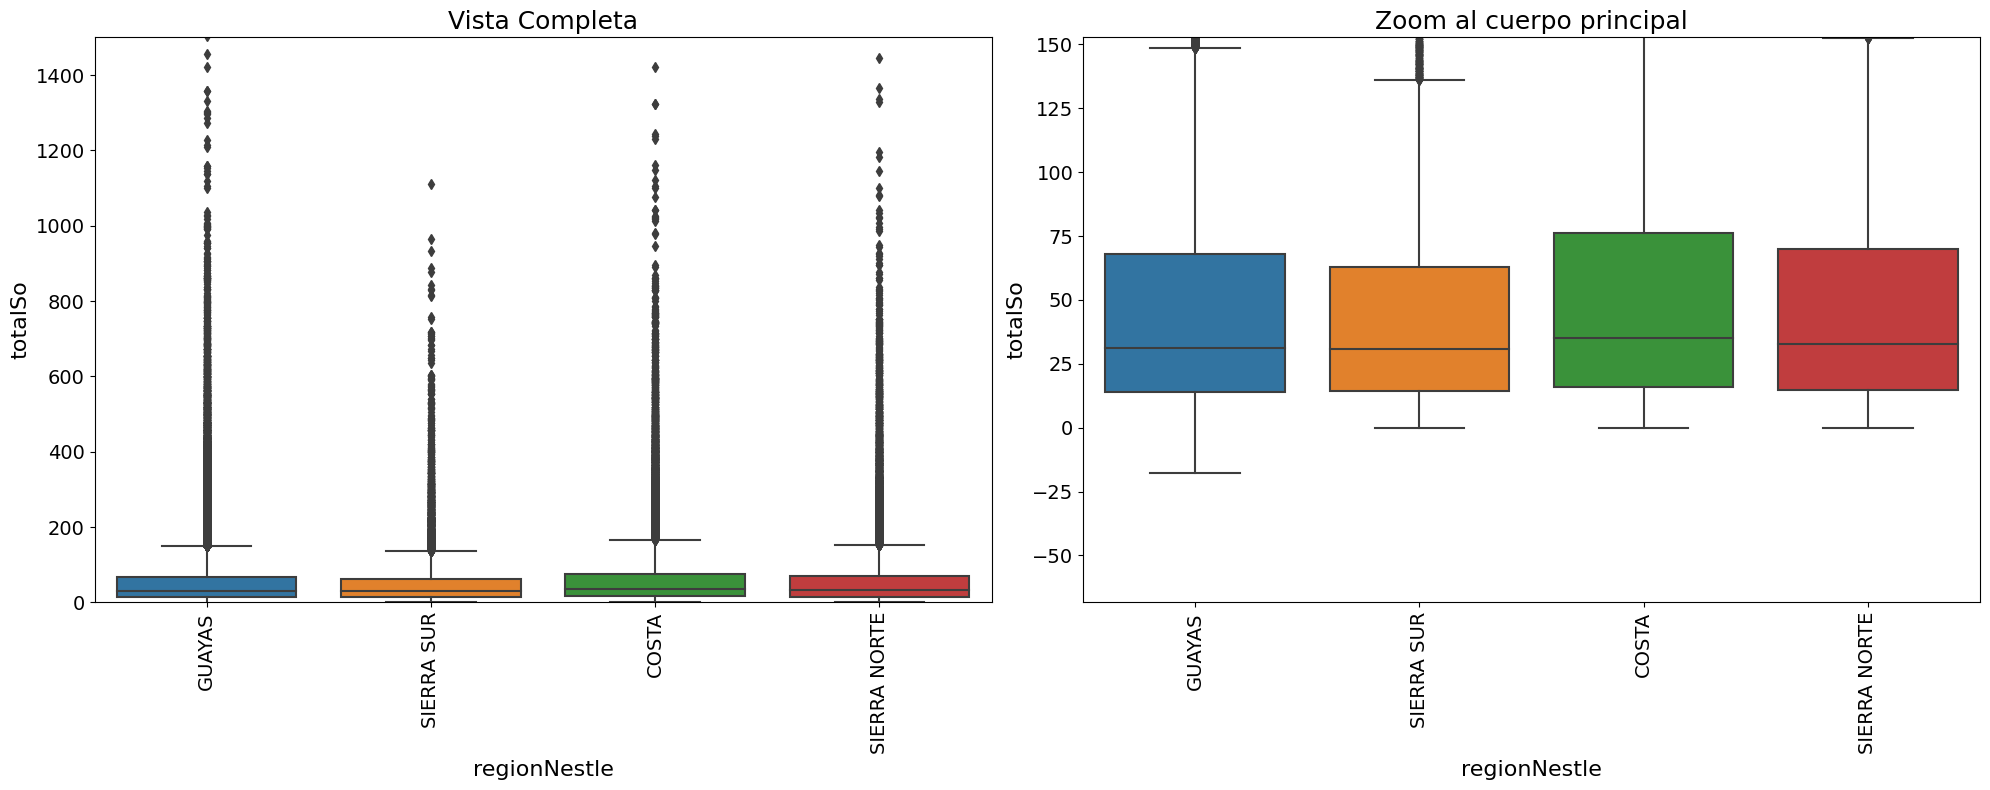

In [6]:
# Suponiendo que ya tienes df, var y data definidos
var = 'regionNestle'
data = pd.concat([df['totalSo'], df[var]], axis=1)

# Crear un grid de 1x2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))  # Cambia las dimensiones del figsize si lo consideras necesario.

# Primer boxplot (vista completa)
sns.boxplot(x=var, y="totalSo", data=data, ax=axes[0])
axes[0].set_title("Vista Completa", fontsize=18)
axes[0].set_ylim([0, 1500])
axes[0].tick_params(axis='x', rotation=90, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_xlabel(var, fontsize=16)
axes[0].set_ylabel("totalSo", fontsize=16)

# Calculamos los cuartiles Q1 y Q3
Q1 = data['totalSo'].quantile(0.25)
Q3 = data['totalSo'].quantile(0.75)

# Establecemos un margen alrededor del IQR
margen = 1.5 * (Q3 - Q1)

# Segundo boxplot (zoom al cuerpo principal)
sns.boxplot(x=var, y="totalSo", data=data, ax=axes[1], showfliers=True)
axes[1].set_title("Zoom al cuerpo principal", fontsize=18)
axes[1].set_ylim([Q1 - margen, Q3 + margen])
axes[1].tick_params(axis='x', rotation=90, labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_xlabel(var, fontsize=16)
axes[1].set_ylabel("totalSo", fontsize=16)

plt.tight_layout()
plt.show()

In [7]:
# Crear un dataframe con las estadísticas deseadas por región
summary = df.groupby("regionNestle")["totalSo"].describe(percentiles=[.25, .5, .75])

# Añadir la desviación estándar al dataframe resumen
summary['std'] = df.groupby("regionNestle")["totalSo"].std()

print(summary[['mean', '25%', '50%', '75%', 'std']])

                   mean       25%        50%        75%        std
regionNestle                                                      
COSTA         65.014094  15.83199  34.920000  76.103412  91.770730
GUAYAS        59.219247  13.81660  31.106495  67.773900  95.375599
SIERRA NORTE  60.888669  14.76072  32.628536  69.869666  87.318081
SIERRA SUR    53.800275  14.40000  30.957696  63.050400  73.188151


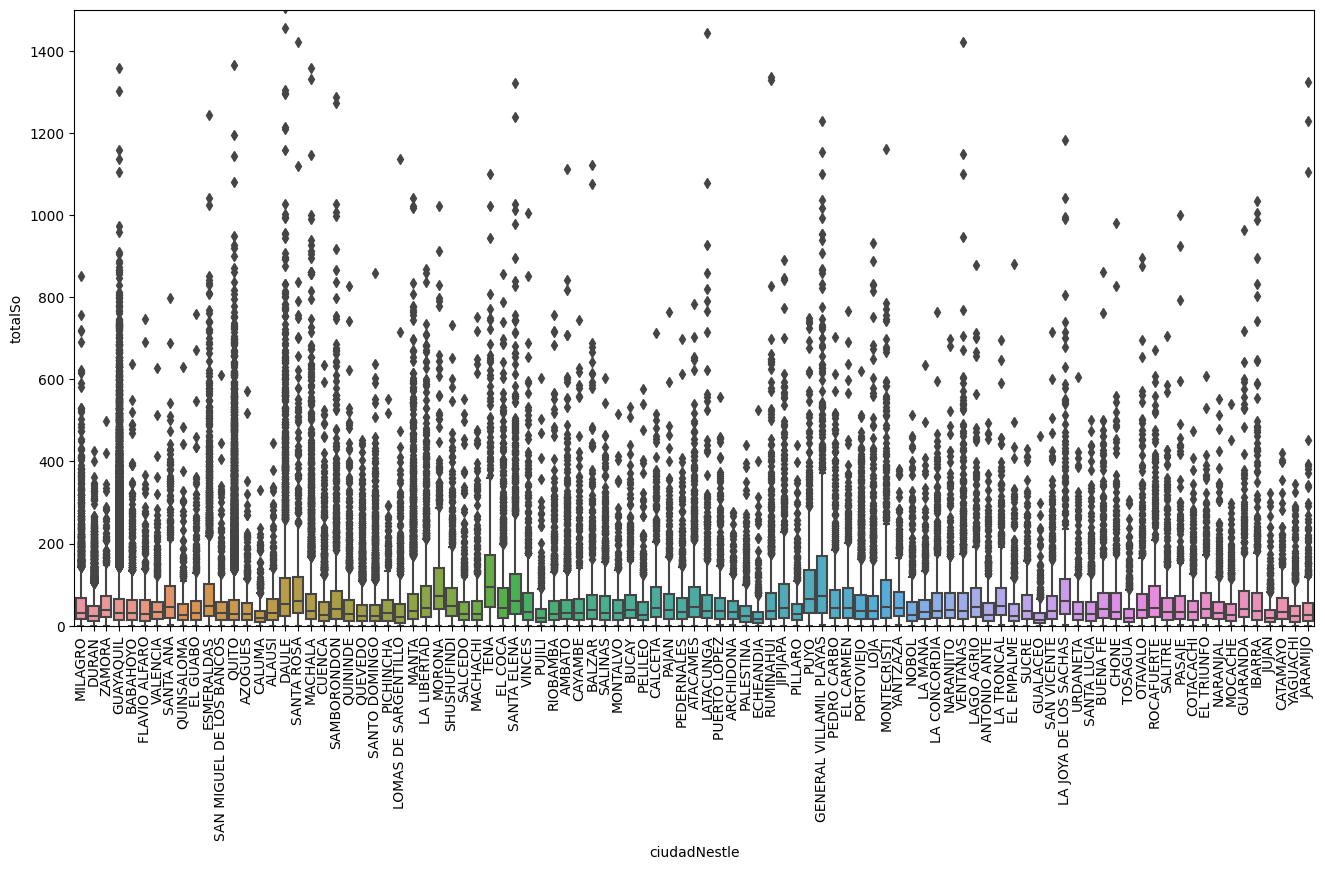

In [8]:
var = 'ciudadNestle'
data = pd.concat([df['totalSo'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="totalSo", data=data)
fig.axis(ymin=0, ymax=1500);
plt.xticks(rotation=90);

In [9]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [10]:
df[var_cuantitativas].corr().style.background_gradient(cmap='coolwarm')

,anio,mes,unidadesVendidas,ventaNeta,totalSo,stock,totalStock
anio,nan,nan,nan,nan,nan,nan,nan
mes,nan,1.000000,0.052599,0.094477,0.099716,0.008117,0.022849
unidadesVendidas,nan,0.052599,1.000000,0.761121,0.765171,0.577638,0.262593
ventaNeta,nan,0.094477,0.761121,1.000000,0.984587,0.488755,0.471933
totalSo,nan,0.099716,0.765171,0.984587,1.000000,0.455794,0.445920
stock,nan,0.008117,0.577638,0.488755,0.455794,1.000000,0.696380
totalStock,nan,0.022849,0.262593,0.471933,0.445920,0.696380,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [12]:
df1=df[['mes','localNestle','ciudadNestle','regionNestle','unidadesVendidas','ventaNeta','totalSo','stock','totalStock']]

In [13]:
df1

,mes,localNestle,ciudadNestle,regionNestle,unidadesVendidas,ventaNeta,totalSo,stock,totalStock
0,2,175,47,1,3.0,14.94,10.050000,295.0,988.250000
1,5,70,18,1,4.0,19.92,13.400000,797.0,2669.950000
2,1,284,96,3,6.0,35.81,28.080000,488.0,2283.840000
3,2,45,30,1,26.0,179.37,121.680000,559.0,2616.120000
4,2,69,30,1,19.0,122.36,88.920000,723.0,3383.640000
...,...,...,...,...,...,...,...,...,...
188485,1,264,30,1,1.0,2.49,1.731480,31.0,53.675880
188486,4,215,64,0,2.0,3.98,2.677200,138.0,184.726800
188487,6,117,71,2,6.0,2.70,1.774080,56.0,16.558080
188488,3,41,17,1,1.0,0.58,0.491155,36.0,17.681586


In [14]:
# Datos perdidos
df1.isna().sum()

mes                 0
localNestle         0
ciudadNestle        0
regionNestle        0
unidadesVendidas    0
ventaNeta           0
totalSo             0
stock               0
totalStock          0
dtype: int64

In [15]:
df1=df1.dropna()

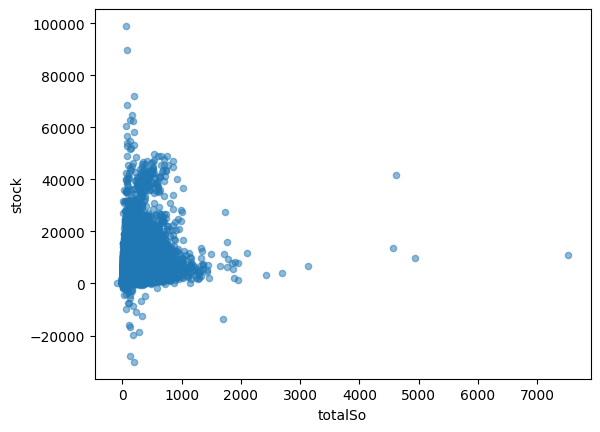

In [16]:
var = 'totalSo'
data = pd.concat([df1['stock'], df1[var]], axis=1)
data.plot.scatter(x=var, y='stock', alpha = 0.5);

In [17]:
#X = df1[df1.columns.difference(['totalSo','ventaNeta','totalStock'])]
X = df1[df1.columns.difference(['totalSo','ventaNeta'])]
y = df1.totalSo

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state =123)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'squared_error',
            max_depth    = None,
            #max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [21]:
y_pred = rf_model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 184.49437861442487


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R cuadrado:", r2)

R cuadrado: 0.9763130470446068


Validacion Cruzada

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [25]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                #max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

KeyboardInterrupt: 

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [20],
                 #'max_features': [5, 7, 10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

In [ ]:
rf_model_fo = RandomForestRegressor(
            n_estimators = 20,
            criterion    = 'squared_error',
            max_depth    = 20,
            max_features = 'sqrt',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )
rf_model_fo.fit(X_train, y_train)

In [ ]:
y_pred_fo = rf_model_fo.predict(X_test)
r2_fo = r2_score(y_test, y_pred_fo)
print("R cuadrado:", r2_fo)

In [ ]:
importancia = permutation_importance(
                estimator    = rf_model_fo,
                X            = X_train,
                y            = y_train,re
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

Redes Neuronales

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
oculta1=tf.keras.layers.Dense(units=10,input_shape=(7,))
oculta2=tf.keras.layers.Dense(units=6,activation='relu')
salida= tf.keras.layers.Dense(units=1,activation='relu')
modelo= tf.keras.Sequential([oculta1,oculta2,salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
historial = modelo.fit(X_train_std, y_train, epochs=100, verbose=True)

In [ ]:
prediccionesRN = modelo.predict(X_test_std)
prediccionesRN = abs(prediccionesRN)

In [ ]:
mseN = mean_squared_error(y_test, prediccionesRN)
print("Error cuadrático medio:", mseN)

r2N = r2_score(y_test, prediccionesRN)
print("R cuadrado:", r2N)